## Homework 8

### Task 1

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras import layers, models
from keras.datasets import mnist
import sklearn

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28), y_train shape: (60000,)
x_test shape: (10000, 28, 28), y_test shape: (10000,)


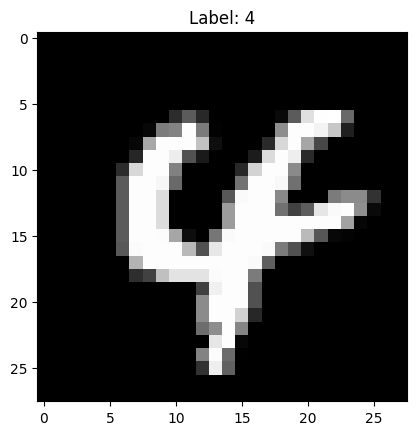

In [3]:
# Load MNIST-Dataset (train- and testdata)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Check data format
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

# Load random image a visualize it
randomSample = np.random.randint(0, x_train.shape[0])
plt.imshow(x_train[randomSample], cmap="gray")
plt.title(f"Label: {y_train[randomSample]}")
plt.show()


### Task 2

In [4]:
from sklearn.model_selection import train_test_split

# Split into 80% training and 20% validation set
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

print(x_train.shape)
print(x_val.shape)

(48000, 28, 28)
(12000, 28, 28)


In [5]:
# Create model
model = models.Sequential()

# Stage 1: First set of layers
model.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Stage 2: Second set of layers
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((1, 1)))

# Stage 3: Third set of layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))

# Stage 4: Flatten layer
model.add(layers.Flatten())

# Stage 5: Fully connected layers with Dropout
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))  # Dropout with rate 0.2
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))  # Dropout with rate 0.2
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))  # Dropout with rate 0.2

# Stage 6: Output layer with Softmax (for classification)
model.add(layers.Dense(128, activation='relu'))  # First dense layer
model.add(layers.Dense(10, activation='softmax'))  # Second dense layer (output)

# Test the model with dummy data
x = tf.ones((1, 28, 28, 1))  # Batch size of 1, 28x28 Graustufenbild
y = model(x)

# Print the number of weights
print("Number of weights after calling the model:", len(model.weights))

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Number of weights after calling the model: 26


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 1, 1, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 1, 1, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 1, 1, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 1, 1, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 75,994 (296.85 KB)

 Trainable params: 75,994 (296.85 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
# Train the model for 10 epochs
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val,y_val))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - acc: 0.5362 - loss: 1.2279 - val_acc: 0.9094 - val_loss: 0.3083
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9141 - loss: 0.3042 - val_acc: 0.9413 - val_loss: 0.2205
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.9446 - loss: 0.2013 - val_acc: 0.9383 - val_loss: 0.2134
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9570 - loss: 0.1658 - val_acc: 0.9663 - val_loss: 0.1314
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.9619 - loss: 0.1401 - val_acc: 0.9633 - val_loss: 0.1331
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.9660 - loss: 0.1308 - val_acc: 0.9646 - val_loss: 0.1263
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9691 - loss: 0.1203 - val_acc: 0.9656 - val_loss: 0.1321
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.9707 - loss: 0.1195 - val_acc: 0.9557 - val_loss: 0.1684
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━

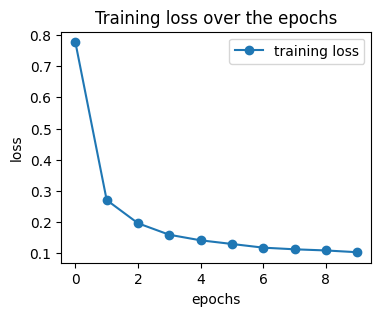

In [10]:
# Plot loss
plt.figure(figsize=(4, 3))
plt.plot(history.history["loss"], label="training loss", marker = 'o', linestyle = '-')
#plt.plot(history.history["val_loss"], label="validation loss")
plt.title("Training loss over the epochs")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [11]:
# Get accuracy for test dataset
test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc *= 100

print(f"Test accuracy: {test_acc:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9658 - loss: 0.1344
Test accuracy: 97.37%


In [12]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [13]:
# Get predictions for test data
y_predicted = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


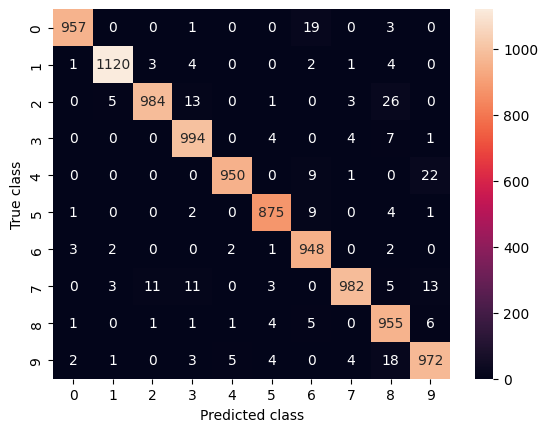

In [16]:
# Turn all predictions into predicted classes (0, 1, 2 ... or 9)
predicted_classes = np.argmax(y_predicted,axis=-1)

# Show confusion matrix for test dataset
conf_matrix = sklearn.metrics.confusion_matrix(y_test, predicted_classes)


sns.heatmap(conf_matrix, annot=True, fmt="d",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()